In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
local_csv = './Data/combine_data_since_2000_PROCESSED_2018-04-26.csv'

In [3]:
df = pd.read_csv(local_csv)
df.isnull().sum()

Player          0
Pos             0
Ht              0
Wt              0
Forty         172
Vertical     1422
BenchReps    2006
BroadJump    1464
Cone         2225
Shuttle      2155
Year            0
Pfr_ID       1323
AV              0
Team         2480
Round        2480
Pick         2480
dtype: int64

In [4]:
df = df[df['Round'].notnull()]

In [5]:
df = df[df['Cone'].notnull()]

In [6]:
df = df[df['BenchReps'].notnull()]

In [7]:
df = df[df['Shuttle'].notnull()]

In [8]:
df = df[df['Pfr_ID'].notnull()]

In [9]:
df = df[df['BroadJump'].notnull()]

In [10]:
df = df[df['Vertical'].notnull()]

In [11]:
df = df[df['Forty'].notnull()]

In [12]:
df.isnull().sum()

Player       0
Pos          0
Ht           0
Wt           0
Forty        0
Vertical     0
BenchReps    0
BroadJump    0
Cone         0
Shuttle      0
Year         0
Pfr_ID       0
AV           0
Team         0
Round        0
Pick         0
dtype: int64

In [40]:
df_CB = df.query("Pos == 'CB'")
df_CB.shape

(220, 16)

In [13]:
df.shape

(1787, 16)

In [14]:
df.groupby('Pos').mean()

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,AV,Round,Pick
Pos,,,,,,,,,,,,
C,75.430769,304.353846,5.233077,28.500000,26.446154,102.307692,7.664154,4.608769,2008.815385,10.830769,3.984615,121.030769
CB,71.077273,193.177273,4.469000,36.184091,14.827273,122.140909,6.924545,4.146227,2009.200000,7.431818,3.659091,105.672727
DE,75.883978,268.469613,4.796630,33.558011,24.386740,115.419890,7.288287,4.399779,2008.911602,7.845304,3.740331,110.281768
DT,74.969512,308.201220,5.068659,29.545732,28.042683,105.548780,7.668415,4.609512,2009.634146,8.646341,3.652439,106.079268
FB,72.285714,243.357143,4.739762,33.238095,24.119048,113.690476,7.267619,4.351190,2007.285714,1.714286,5.238095,161.285714
FS,72.637500,207.100000,4.544500,36.075000,16.087500,121.125000,6.970250,4.181125,2007.550000,8.300000,3.950000,116.325000
ILB,73.475000,241.575000,4.710875,33.700000,22.887500,115.800000,7.142375,4.264125,2008.412500,9.225000,4.175000,125.600000
LS,74.000000,231.000000,4.930000,29.000000,21.000000,118.000000,7.030000,4.330000,2008.000000,0.000000,6.000000,189.000000
OG,75.961538,313.392308,5.249000,28.107692,26.600000,101.815385,7.823538,4.718692,2008.907692,8.623077,4.130769,124.869231


In [15]:
df.Round.value_counts().sort_values()
y = df['Round']

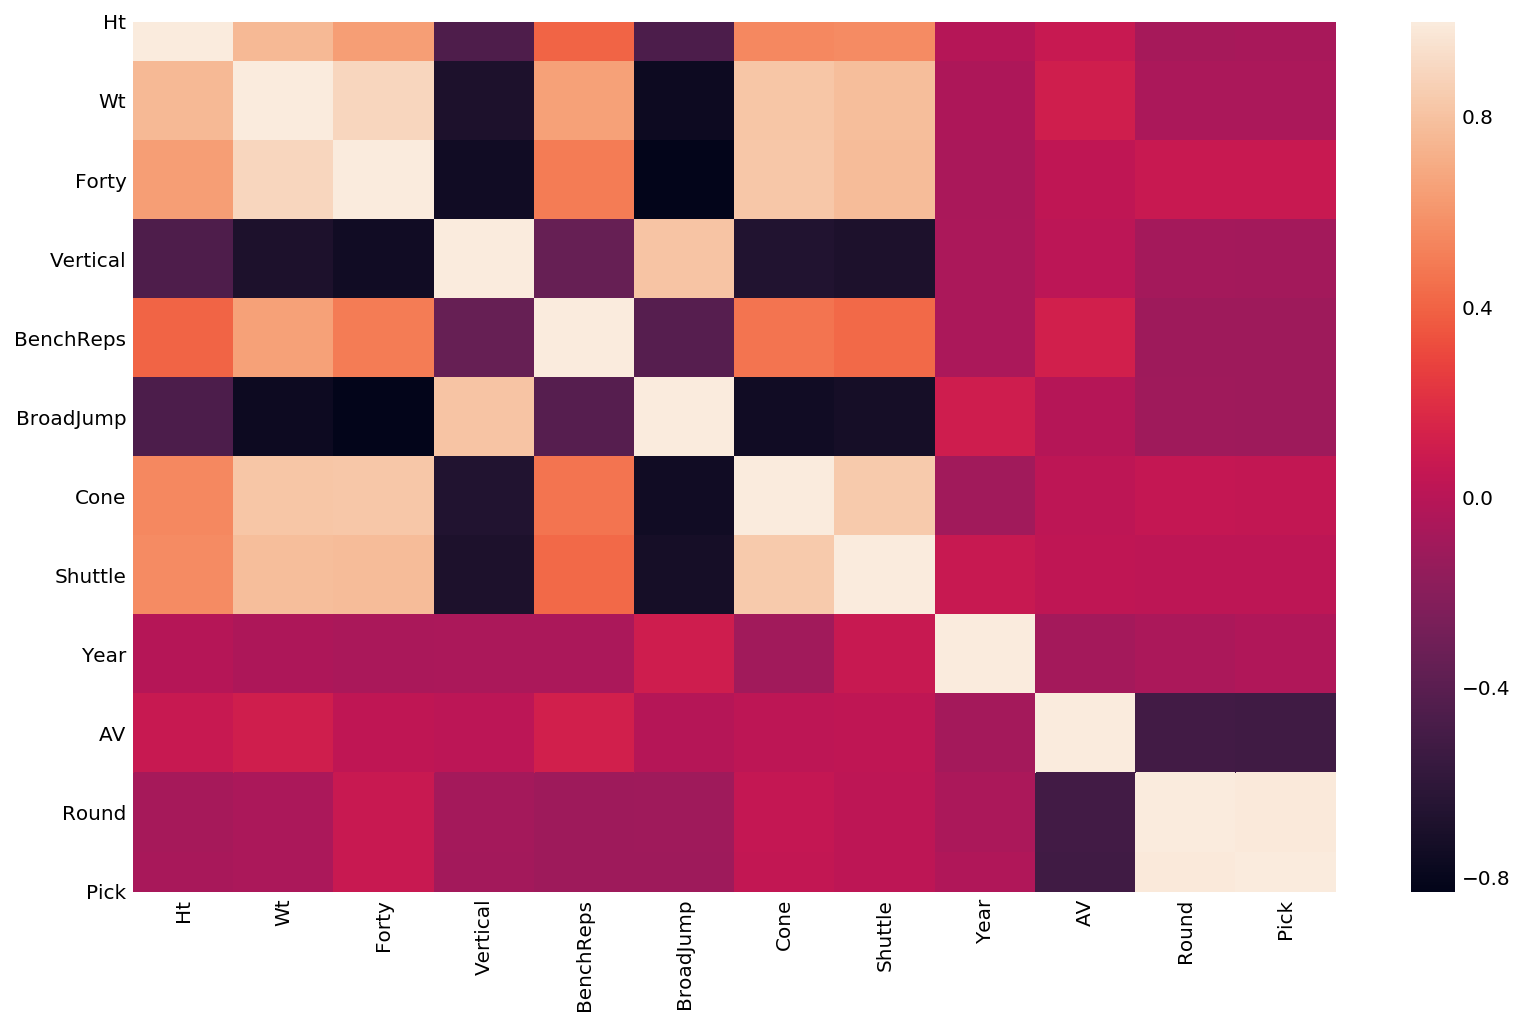

In [16]:
#quick test
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())
df.corr()['Round'].sort_values()
X = df[['Ht','Wt', 'Forty', 'Vertical', 'BroadJump', 'Cone', 'Shuttle', 'BenchReps']]

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate
kn = KNeighborsClassifier(n_neighbors = 5)

# Fit
kn.fit(X,y)

# Predict
kn_preds = kn.predict(X)

# Score
kn.score(X,y)

0.42753217683268047

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1250, 8), (537, 8), (1250,), (537,))

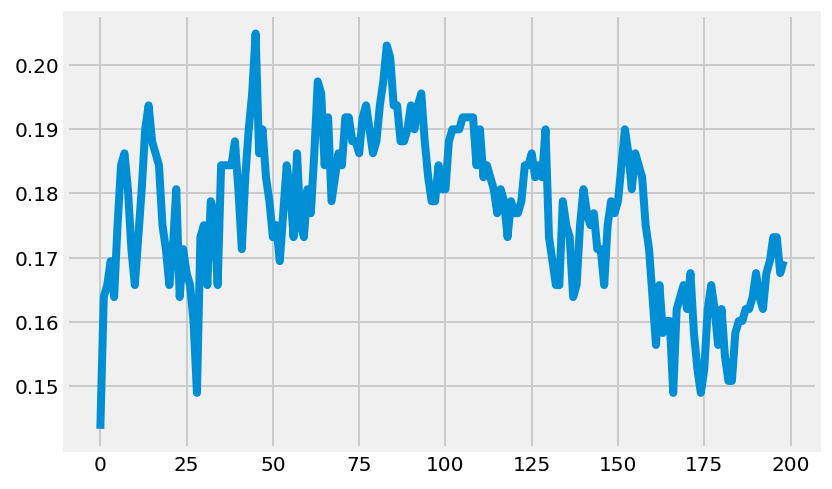

In [23]:
scores = dict()
scores_list = []

for k in range(1, 200):
    kn = KNeighborsClassifier(k)
    kn.fit(X_train,y_train)
    score = kn.score(X_test,y_test)
    scores[k] = score
    scores_list.append(score)
    
plt.plot(scores_list);

In [20]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_transform = stdsc.fit_transform(X_train)
X_test_transform = stdsc.transform(X_test)

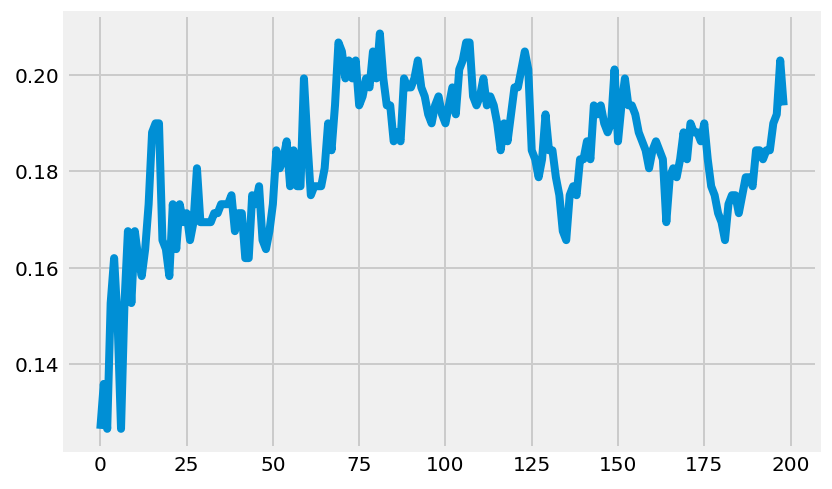

In [22]:
scores = dict()
scores_list = []

for k in range(1, 200):
    kn = KNeighborsClassifier(k)
    kn.fit(X_train_transform,y_train)
    score = kn.score(X_test_transform,y_test)
    scores[k] = score
    scores_list.append(score)
    
plt.plot(scores_list);

In [44]:
np.max(scores_list)

0.2048417132216015

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1197, 8), (590, 8), (1197,), (590,))

In [25]:
#instantiate
lm = LinearRegression()
dt = DecisionTreeRegressor()

#fit
lm.fit(X_train,y_train)
dt.fit(X_train,y_train)

#predict
lm_predict = lm.predict(X_test)
dt_predict = dt.predict(X_test)

#score
print(lm.score(X_test, y_test))
print(dt.score(X_test, y_test))

0.11075946089428912
-0.6565062095417784


In [42]:
# Try again with position specific testing
df.Round.value_counts().sort_values()
y = df_CB['Round']

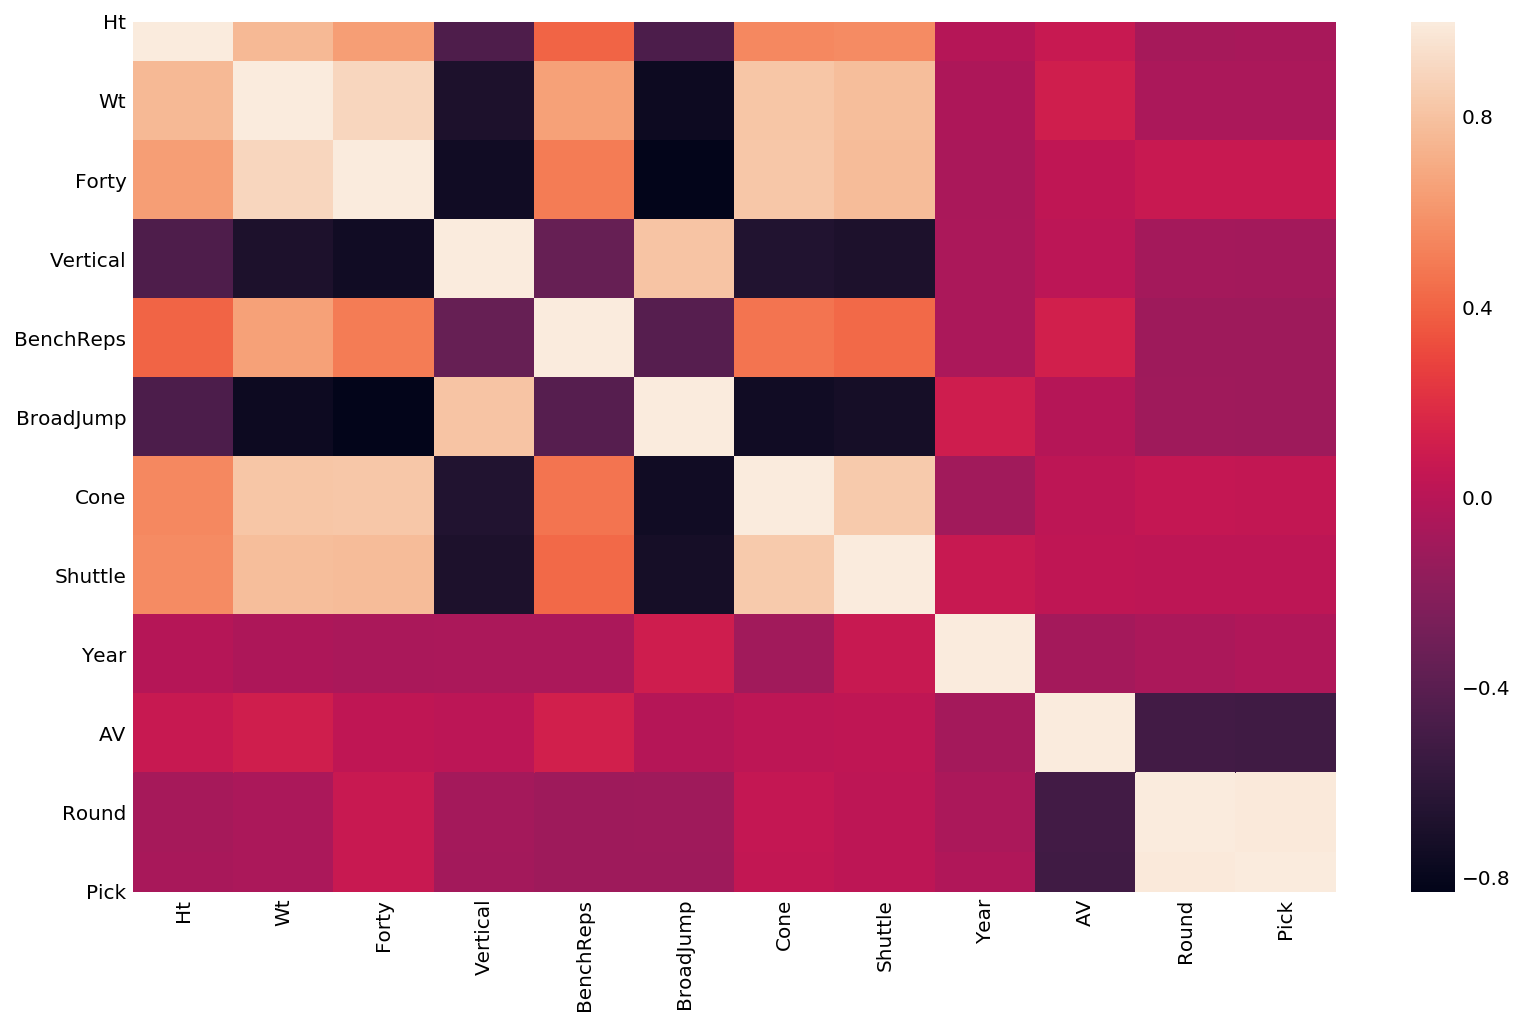

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())
df.corr()['Round'].sort_values()
X = df_CB[['Ht','Wt', 'Forty', 'Vertical', 'BroadJump', 'Cone', 'Shuttle', 'BenchReps']]

In [45]:
# CB combine scores
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((147, 8), (73, 8), (147,), (73,))

In [46]:
# CB combines scores
#instantiate
lm = LinearRegression()
dt = DecisionTreeRegressor()

#fit
lm.fit(X_train,y_train)
dt.fit(X_train,y_train)

#predict
lm_predict = lm.predict(X_test)
dt_predict = dt.predict(X_test)

#score
print(lm.score(X_test, y_test))
print(dt.score(X_test, y_test))

0.21920134396105728
-0.046481320590790576
